In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [ ]:
image = imread("//content//drive//MyDrive//lena.jpg")
image.shape

(512, 512, 3)

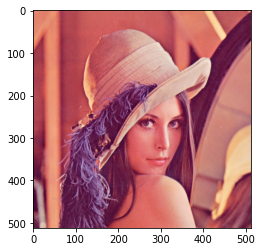

In [ ]:

plt.imshow(image)

In [ ]:
X = image.reshape(-1,3)

cluster_lst = [1, 2, 3]
result = []
for i in cluster_lst:
  pca = PCA(n_components=i)
  x_reduced = pca.fit_transform(X)
  x_recovered = pca.inverse_transform(x_reduced)
  seg_img = x_recovered.reshape(image.shape)
  seg_img = seg_img.astype(np.uint8)
  result.append(seg_img)

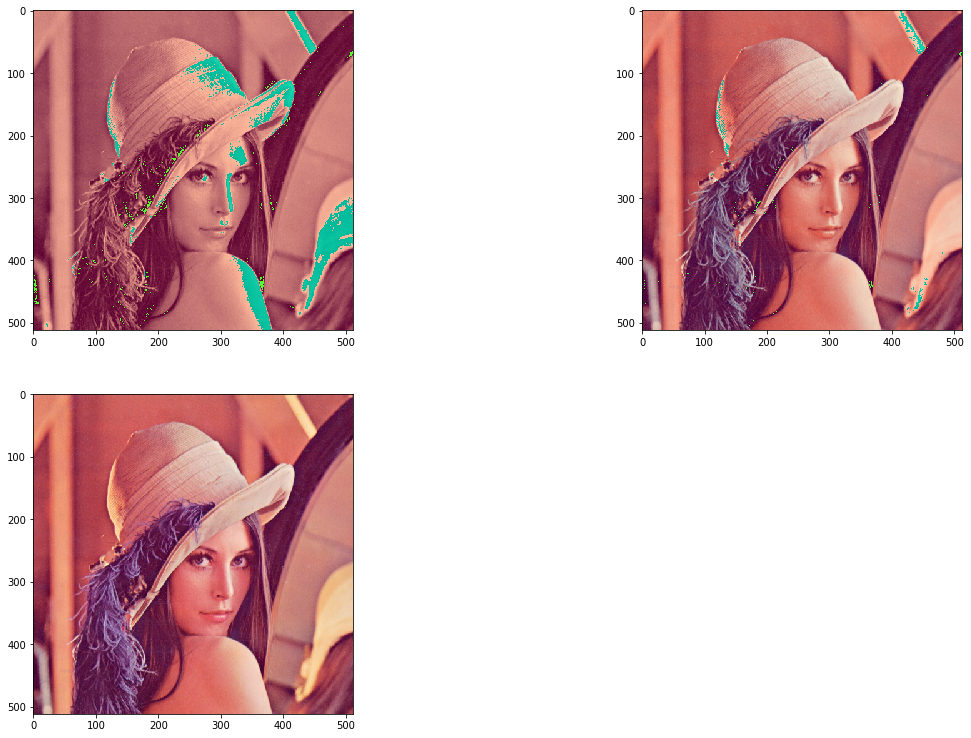

In [ ]:
fig1 = plt.figure(figsize = (20,20))

for i in range(len(cluster_lst)):
  ax = fig1.add_subplot(3,2,i+1)
  ax.imshow(result[i], interpolation='none')

In [ ]:
X = image.reshape(-1,3)

cluster_lst = [3, 6, 9, 12, 15, 20]
result = []
for i in cluster_lst:
  kmeans = KMeans(n_clusters=i).fit(X)
  seg_img = kmeans.cluster_centers_[kmeans.labels_]
  seg_img = seg_img.reshape(image.shape)
  seg_img = seg_img.astype(np.uint8)
  result.append(seg_img)

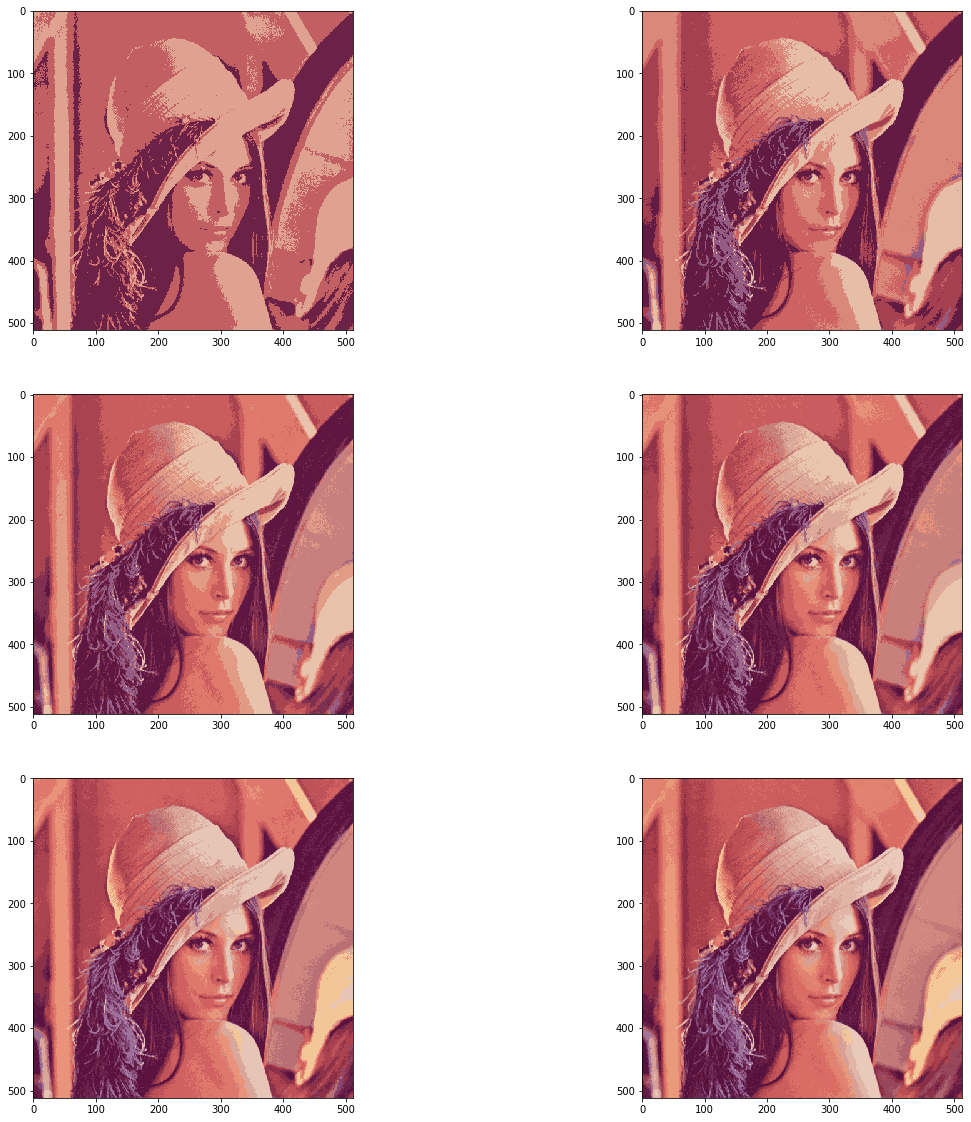

In [ ]:
fig1 = plt.figure(figsize = (20,20))

for i in range(len(cluster_lst)):
  ax = fig1.add_subplot(3,2,i+1)
  ax.imshow(result[i], interpolation='none')

In [ ]:
X = image.reshape(-1,3)

min_samples_lst = [1, 5, 10, 20]
eps_lst = [0.01, 0.1, 0.2, 0.5]
result = []
for i in min_samples_lst:
  for j in eps_lst:
    dbscan = DBSCAN(eps=j, min_samples=i).fit(X)
    # noisy data의 경우 label이 -1이 되어서 0으로 통일
    tmp = [0 if x==-1 else x for x in dbscan.labels_]
    seg_img = dbscan.components_[tmp]
    seg_img = seg_img.reshape(image.shape)
    seg_img = seg_img.astype(np.uint8)
    result.append(seg_img)

ValueError: ignored

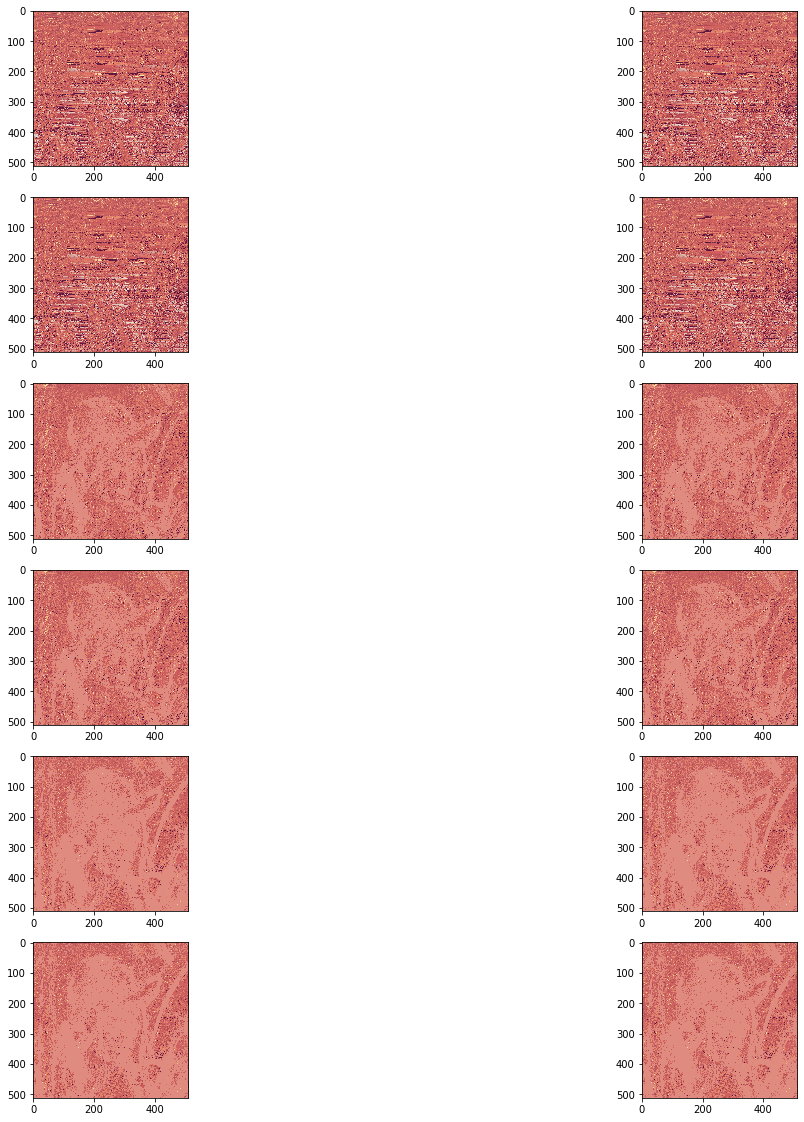

In [ ]:
fig1 = plt.figure(figsize = (20,20))

for i in range(len(min_samples_lst)*len(eps_lst)):
  ax = fig1.add_subplot(6,2,i+1)
  ax.imshow(result[i], interpolation='none')